In [1]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import statistics
import scipy.stats

In [6]:
data_year = "2020"
cell_name = "HUVEC"
task = "Martin_1"

data_dir = os.path.join("00_outputs_" + data_year + "_" + cell_name)

out_dir = "00_plots_" + data_year + "_" + cell_name + "_" + task
os.makedirs(out_dir, exist_ok = True)

## Data_norm

In [3]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
LJP007_HUVEC_24H:A05,-0.118534,-0.106533,-0.552448,-0.136094,-0.013804,-0.072984,0.909445,0.065044,-0.020653,-0.661483,...,-0.164372,0.146537,0.036117,0.115300,-0.143709,-0.317039,0.106789,1.323801,-0.082965,-0.391660
LJP007_HUVEC_24H:A06,0.058216,0.151700,-0.571765,-0.150978,-0.063320,-0.239401,-0.104672,0.051012,0.038314,0.186550,...,-0.271071,-0.144547,-0.084201,0.244817,0.230891,-0.301105,-0.148794,1.395884,-0.190699,0.509806
LJP007_HUVEC_24H:B05,-0.136634,-0.264667,0.548352,0.070223,-0.056904,1.450533,-0.035372,0.021478,-0.248052,-0.851566,...,-0.345803,0.420653,0.212466,0.330435,0.351074,0.340061,0.095622,-0.623049,0.092885,-0.511843
LJP007_HUVEC_24H:B06,-0.210517,-0.313434,-0.727799,-0.149377,-0.421704,-0.485584,-0.247222,-0.006922,-0.131553,0.201866,...,0.408163,0.158620,0.307850,-0.403699,0.094174,0.008345,0.040805,-0.465449,-0.309849,-0.187745
LJP007_HUVEC_24H:F07,0.075182,0.023066,-0.586449,-0.100211,0.075096,-0.294834,1.041045,0.119778,-0.076086,-1.342532,...,0.191746,0.154321,0.009766,0.058135,0.019191,-0.593889,0.193672,-0.728383,-0.001732,0.953056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REP.B024_HUVEC.A_24H:P20,-1.905539,-0.007300,-0.731396,0.430556,-0.123994,-0.124384,-2.507582,0.673428,-0.800314,1.072226,...,0.379562,-0.212133,0.529867,-0.525423,-0.088439,0.871560,-0.600894,-3.597260,-1.679630,-0.288190
REP.B024_HUVEC.A_24H:P21,-0.899890,-1.306725,-0.443996,0.422006,-0.196544,1.689516,1.616344,0.300803,1.115086,1.310501,...,-0.362287,-0.747232,-0.086258,-0.460922,-0.229714,0.809110,-0.215394,2.225764,-1.067355,-0.608665
REP.B024_HUVEC.A_24H:P22,-0.610090,-1.250375,-0.759471,-1.218294,-0.385945,-0.283684,-1.916481,0.326352,0.106261,1.672676,...,-0.877188,-1.068082,0.050643,-0.186422,-0.074739,1.141760,-0.771319,-3.588660,-1.175005,-0.057915
REP.B024_HUVEC.A_24H:P23,-0.493390,-0.273625,-0.501471,0.178356,-0.416220,-0.474659,-2.683532,0.249828,-0.068814,1.412802,...,-0.672188,-0.282732,0.166068,-0.499798,0.659486,0.910010,-0.145194,-3.728935,-1.278155,-0.641515


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

## Sig_info

In [4]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
LJP007_HUVEC_24H:A05,HUVEC,LJP007,24 h,LJP007_HUVEC_24H_X1_B21:A05|LJP007_HUVEC_24H_X...,3,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
LJP007_HUVEC_24H:A06,HUVEC,LJP007,24 h,LJP007_HUVEC_24H_X1_B21:A06|LJP007_HUVEC_24H_X...,3,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
LJP007_HUVEC_24H:B05,HUVEC,LJP007,24 h,LJP007_HUVEC_24H_X1_B21:B05|LJP007_HUVEC_24H_X...,3,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
LJP007_HUVEC_24H:B06,HUVEC,LJP007,24 h,LJP007_HUVEC_24H_X1_B21:B06|LJP007_HUVEC_24H_X...,3,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
LJP007_HUVEC_24H:F07,HUVEC,LJP007,24 h,LJP007_HUVEC_24H_X1_B21:F07|LJP007_HUVEC_24H_X...,3,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
REP.B024_HUVEC.A_24H:P20,HUVEC,REP.B024,24 h,REP.B024_HUVEC.A_24H_X2_B25:P20,1,trt_cp,sirolimus,"FKBP1A, MTOR",2,0.74 uM,0.74
REP.B024_HUVEC.A_24H:P21,HUVEC,REP.B024,24 h,REP.B024_HUVEC.A_24H_X2_B25:P21,1,trt_cp,sirolimus,"FKBP1A, MTOR",2,0.25 uM,0.25
REP.B024_HUVEC.A_24H:P22,HUVEC,REP.B024,24 h,REP.B024_HUVEC.A_24H_X2_B25:P22,1,trt_cp,sirolimus,"FKBP1A, MTOR",2,0.08 uM,0.08


## Input_info - ALL_DATA (modules, STV)

In [7]:
data_file = "ALL_DATA_" + data_year + "_" + task + ".xlsx"
modules = pd.read_excel(data_file, sheet_name = "modules", index_col = 0)
display(modules)

""
Module
CDK1/2
PAK
PI3K
ERK
BET
Aurora
TGFbR
VEGFR
PKC


## STV (State Transition Vectors)

In [8]:
data_file = "ALL_DATA_" + data_year + "_" + task + ".xlsx" 
STVs = pd.read_excel(data_file, sheet_name = "STVs", index_col = 0)
display(STVs)

states = STVs.columns.to_list()
print("States:", states)

,FSS,remod,OSS
Gene,,,
KIT,0.159163,-0.085553,0.287581
E2F2,0.080218,0.057462,0.146547
TGFBR2,-0.021403,-0.032023,0.093434
ETV1,-0.034161,-0.012043,0.088598
KIF20A,0.039590,0.034655,0.083541
...,...,...,...
TSC22D3,0.172875,-0.107161,-0.136908
CD58,0.014362,-0.034994,-0.152116
SFN,0.228158,-0.061094,-0.168513


States: ['FSS', 'remod', 'OSS']


In [9]:
STV_df = pd.DataFrame(
    np.zeros((len(genes_list), len(states))), 
    index = genes_list, 
    columns = states)

STV_df.loc[STVs.index] = STVs

display(STV_df)

,FSS,remod,OSS
AARS,0.000000,0.000000,0.000000
ABCB6,-0.003990,-0.072129,-0.007938
ABCC5,-0.011552,-0.023766,-0.010069
ABCF1,-0.020014,-0.021833,0.029174
ABCF3,0.007379,0.016256,0.008109
...,...,...,...
ZNF395,-0.081815,0.001035,0.051654
ZNF451,0.000206,-0.016318,-0.020391
ZNF586,-0.009845,-0.021145,-0.012347
ZNF589,0.007465,-0.000317,-0.020764


## DPD calculating

In [10]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)

for exp_id in DPD_df.index:
    for state in states:
        DPD_df.loc[exp_id, state] = np.dot(Data_norm.loc[exp_id], STV_df.loc[:, state])

display(DPD_df)

,FSS,remod,OSS
LJP007_HUVEC_24H:A05,-0.236129,0.222209,-0.104822
LJP007_HUVEC_24H:A06,-0.216964,-0.184451,-0.025299
LJP007_HUVEC_24H:B05,0.607028,0.606231,0.744496
LJP007_HUVEC_24H:B06,0.344296,0.944157,0.000616
LJP007_HUVEC_24H:F07,-0.181821,0.002615,0.425782
...,...,...,...
REP.B024_HUVEC.A_24H:P20,-1.132676,0.780040,0.109360
REP.B024_HUVEC.A_24H:P21,-2.067265,-0.972851,-0.950441
REP.B024_HUVEC.A_24H:P22,-0.749697,-0.157520,-2.961404
REP.B024_HUVEC.A_24H:P23,1.477423,0.568278,0.033538


In [11]:
DPD_inf_df = pd.concat([
                            DPD_df,
                            sig_info_cell_df.loc[DPD_df.index, ["pert_drug", "targets", "dose"]]
                            ], axis = 1)

display(DPD_inf_df)

,FSS,remod,OSS,pert_drug,targets,dose
LJP007_HUVEC_24H:A05,-0.236129,0.222209,-0.104822,DMSO,DMSO_No_target,0 uM
LJP007_HUVEC_24H:A06,-0.216964,-0.184451,-0.025299,DMSO,DMSO_No_target,0 uM
LJP007_HUVEC_24H:B05,0.607028,0.606231,0.744496,DMSO,DMSO_No_target,0 uM
LJP007_HUVEC_24H:B06,0.344296,0.944157,0.000616,DMSO,DMSO_No_target,0 uM
LJP007_HUVEC_24H:F07,-0.181821,0.002615,0.425782,DMSO,DMSO_No_target,0 uM
...,...,...,...,...,...,...
REP.B024_HUVEC.A_24H:P20,-1.132676,0.780040,0.109360,sirolimus,"FKBP1A, MTOR",0.74 uM
REP.B024_HUVEC.A_24H:P21,-2.067265,-0.972851,-0.950441,sirolimus,"FKBP1A, MTOR",0.25 uM
REP.B024_HUVEC.A_24H:P22,-0.749697,-0.157520,-2.961404,sirolimus,"FKBP1A, MTOR",0.08 uM
REP.B024_HUVEC.A_24H:P23,1.477423,0.568278,0.033538,sirolimus,"FKBP1A, MTOR",0.03 uM


In [12]:
DPD_inf_df.to_excel(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))
DPD_inf_df.to_csv(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".csv"))

## Analisys of DPD values to find targets

In [13]:
i = 0
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,FSS,remod,OSS,pert_drug,targets,dose
REP.A013_HUVEC.A_24H:L17,-5.369048,1.799238,0.417512,butorphanol-(+)-tartrate,"OPRD1, OPRK1, OPRM1",0.125 uM
REP.A011_HUVEC.A_24H:F08,-4.895315,-1.330542,0.955564,DMSO,DMSO_No_target,0 uM
REP.A028_HUVEC.A_24H:B05,-4.632813,-1.201542,-2.235100,DMSO,DMSO_No_target,0 uM
REP.A013_HUVEC.A_24H:J08,-4.523765,1.015899,2.261578,balsalazide,"PTGS1, PTGS2",3.33 uM
REP.A014_HUVEC.A_24H:M13,-4.483543,-1.352761,0.378701,rabeprazole,ATP4A,10 uM
REP.A028_HUVEC.A_24H:N23,-4.360644,-0.608631,-4.509782,pranlukast,"CYSLTR1, CYSLTR2",0.125 uM
REP.A028_HUVEC.A_24H:N05,-4.214676,-3.028154,-2.466868,relcovaptan,AVPR1A,0.125 uM
REP.A028_HUVEC.A_24H:F22,-4.104659,0.277810,3.156289,tamoxifen,"ESR1, ESR2",0.37 uM
REP.A014_HUVEC.A_24H:A05,-4.064939,-2.821751,-0.354523,DMSO,DMSO_No_target,0 uM
REP.A014_HUVEC.A_24H:N19,-4.007172,-0.751085,-2.782878,teroxirone,,10 uM


Targets: 14 ['', 'ATP4A', 'AVPR1A', 'CYSLTR1, CYSLTR2', 'DMSO_No_target', 'ESR1, ESR2', 'FKBP1A, MTOR', 'IDH1', 'MAOA', 'NFE2L2', 'OPRD1, OPRK1, OPRM1', 'PSMB1', 'PSMB1, PSMB2, PSMB5', 'PTGS1, PTGS2']


In [14]:
i = 1
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,FSS,remod,OSS,pert_drug,targets,dose
LJP009_HUVEC.A_24H:B03,4.594973,-7.603411,-10.680193,sirolimus,"FKBP1A, MTOR",10 uM
LJP009_HUVEC.A_24H:A03,3.336128,-7.036444,-10.191977,vorinostat,"HDAC1, HDAC2, HDAC3, HDAC6, HDAC8",10 uM
REP.A013_HUVEC.A_24H:A20,-3.846099,-7.005489,-5.237995,zardaverine,PDE4D,3.33 uM
REP.A028_HUVEC.A_24H:P22,1.319280,-6.977041,-0.274315,cyanocobalamin,MMUT,0.37 uM
REP.A028_HUVEC.A_24H:P24,0.046052,-6.463404,0.066684,cyanocobalamin,MMUT,0.04 uM
REP.A028_HUVEC.A_24H:I16,-3.257819,-5.947975,-4.401973,asenapine,"ADRB2, DRD1, DRD2, HRH1, HTR1A, HTR1B, HTR2A",0.37 uM
REP.A028_HUVEC.A_24H:I18,3.314273,-5.429017,1.277157,asenapine,"ADRB2, DRD1, DRD2, HRH1, HTR1A, HTR1B, HTR2A",0.04 uM
REP.A011_HUVEC.A_24H:J10,0.770857,-4.834995,0.640911,voriconazole,"CYP2C19, CYP2C9, CYP3A4, CYP3A5, PTGS1",0.37 uM
REP.A028_HUVEC.A_24H:K22,-2.255813,-4.596373,-2.603153,brequinar,DHODH,0.37 uM
REP.A028_HUVEC.A_24H:A23,-1.702654,-4.573322,-5.703485,danazol,"ESR1, GNRHR",0.125 uM


Targets: 14 ['', 'ADRB2, DRD1, DRD2, HRH1, HTR1A, HTR1B, HTR2A', 'AURKA, AURKB, FGFR1, FGFR2, KDR, PDGFRA, PDGFRB', 'CYP2C19, CYP2C9, CYP3A4, CYP3A5, PTGS1', 'DHODH', 'ESR1, GNRHR', 'FKBP1A, MTOR', 'HDAC1, HDAC2, HDAC3, HDAC6, HDAC8', 'MET', 'MMUT', 'PDE4D', 'PSMB1, PSMB2, PSMB5', 'PTGS1, PTGS2', 'SLC6A2']


In [15]:
i = 2
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,FSS,remod,OSS,pert_drug,targets,dose
REP.B023_HUVEC.A_24H:K10,-0.760776,0.128112,-13.034288,MG-132,PSMB1,20 uM
REP.B024_HUVEC.A_24H:G18,1.847560,0.543309,-12.765121,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
REP.B024_HUVEC.A_24H:K09,2.981545,1.129899,-12.572315,MG-132,PSMB1,20 uM
REP.B013_HUVEC.A_24H:C22,0.323153,1.415620,-12.381799,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
REP.A009_HUVEC.A_24H:G13,-0.228651,-0.639393,-12.283002,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
REP.B022_HUVEC.A_24H:O01,0.913392,0.105277,-12.099377,MG-132,PSMB1,20 uM
REP.A009_HUVEC.A_24H:G15,0.698173,-0.750965,-12.031933,bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
REP.A009_HUVEC.A_24H:K09,1.647125,0.206530,-11.972967,MG-132,PSMB1,20 uM
REP.B022_HUVEC.A_24H:K08,-0.276707,0.928626,-11.862400,MG-132,PSMB1,20 uM
REP.B021_HUVEC.A_24H:K11,1.224224,1.154211,-11.812207,MG-132,PSMB1,20 uM


Targets: 11 ['', 'AOC1', 'ATP4A', 'CDK2, CDK7, CDK9', 'CHRM1', 'DRD2, HTR2A', 'FFAR1', 'PDE11A, PDE5A', 'PPARG', 'PSMB1', 'PSMB1, PSMB2, PSMB5']


In [16]:
### copy manually
targets_list = ["ATP4A", "AVPR1A", "CYSLTR1", "CYSLTR2", "ESR1", "ESR2", "FKBP1A", "MTOR", "IDH1", "MAOA", "NFE2L2", "OPRD1", "OPRK1", "OPRM1", "PSMB1", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "ADRB2", "DRD1", "DRD2", "HRH1", "HTR1A", "HTR1B", "HTR2A", "AURKA", "AURKB", "FGFR1", "FGFR2", "KDR", "PDGFRA", "PDGFRB", "CYP2C19", "CYP2C9", "CYP3A4", "CYP3A5", "PTGS1", "DHODH", "ESR1", "GNRHR", "FKBP1A", "MTOR", "HDAC1", "HDAC2", "HDAC3", "HDAC6", "HDAC8", "MET", "MMUT", "PDE4D", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "SLC6A2", "AOC1", "ATP4A", "CDK2", "CDK7", "CDK9", "CHRM1", "DRD2", "HTR2A", "FFAR1", "PDE11A", "PDE5A", "PPARG", "PSMB1", "PSMB1", "PSMB2", "PSMB5"]
targets_list = sorted(list(set(targets_list )))
print("Targets:", len(targets_list ), targets_list) 

Targets: 57 ['ADRB2', 'AOC1', 'ATP4A', 'AURKA', 'AURKB', 'AVPR1A', 'CDK2', 'CDK7', 'CDK9', 'CHRM1', 'CYP2C19', 'CYP2C9', 'CYP3A4', 'CYP3A5', 'CYSLTR1', 'CYSLTR2', 'DHODH', 'DRD1', 'DRD2', 'ESR1', 'ESR2', 'FFAR1', 'FGFR1', 'FGFR2', 'FKBP1A', 'GNRHR', 'HDAC1', 'HDAC2', 'HDAC3', 'HDAC6', 'HDAC8', 'HRH1', 'HTR1A', 'HTR1B', 'HTR2A', 'IDH1', 'KDR', 'MAOA', 'MET', 'MMUT', 'MTOR', 'NFE2L2', 'OPRD1', 'OPRK1', 'OPRM1', 'PDE11A', 'PDE4D', 'PDE5A', 'PDGFRA', 'PDGFRB', 'PPARG', 'PSMB1', 'PSMB2', 'PSMB5', 'PTGS1', 'PTGS2', 'SLC6A2']


## Plots for targets

In [17]:
print_drugs = []

### CDK1/2

In [18]:
target_name = "CDK1_CDK2"

target = "CDK1"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "CDK2"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target CDK1_CDK2: 5 ['CGP-60474', 'PHA-848125', 'alvocidib', 'dinaciclib', 'roscovitine']


In [19]:
drugs_list = drugs + ["OTS-167", "PHA-767491"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
CGP-60474,CDK1,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
PHA-848125,"CDK1, CDK2, CDK4, NTRK1","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
dinaciclib,"CDK1, CDK2, CDK5, CDK9","0.04 uM, 0.37 uM, 1.11 uM"
roscovitine,"CDK2, CDK7, CDK9","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
OTS-167,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
PHA-767491,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


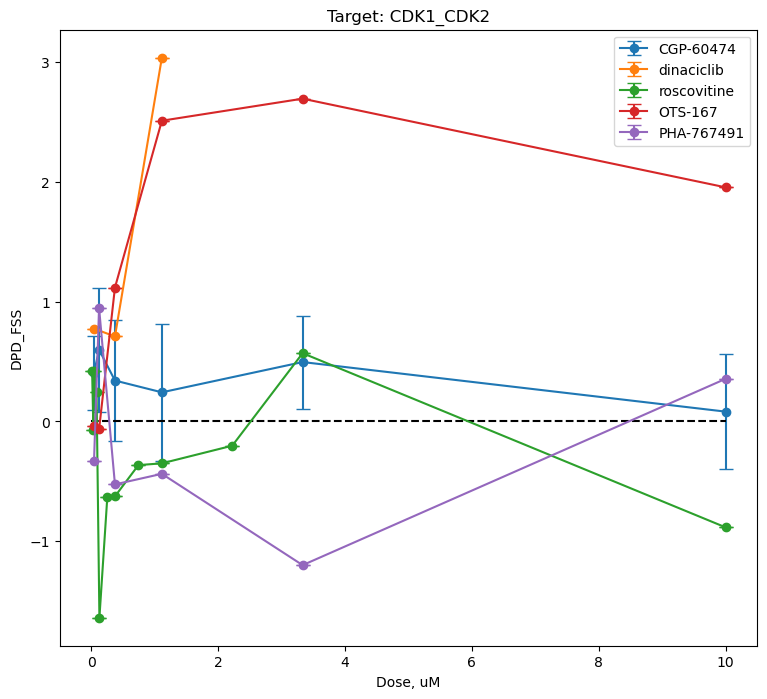

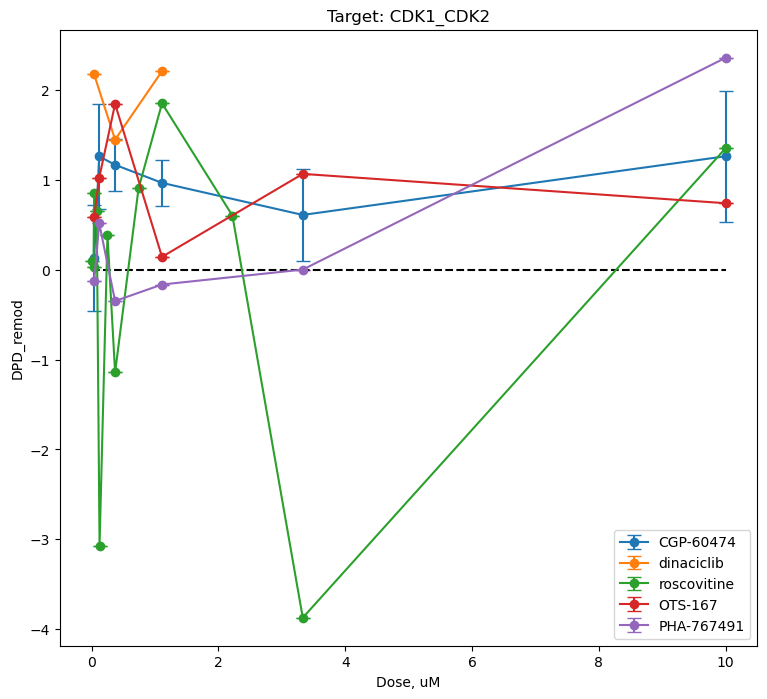

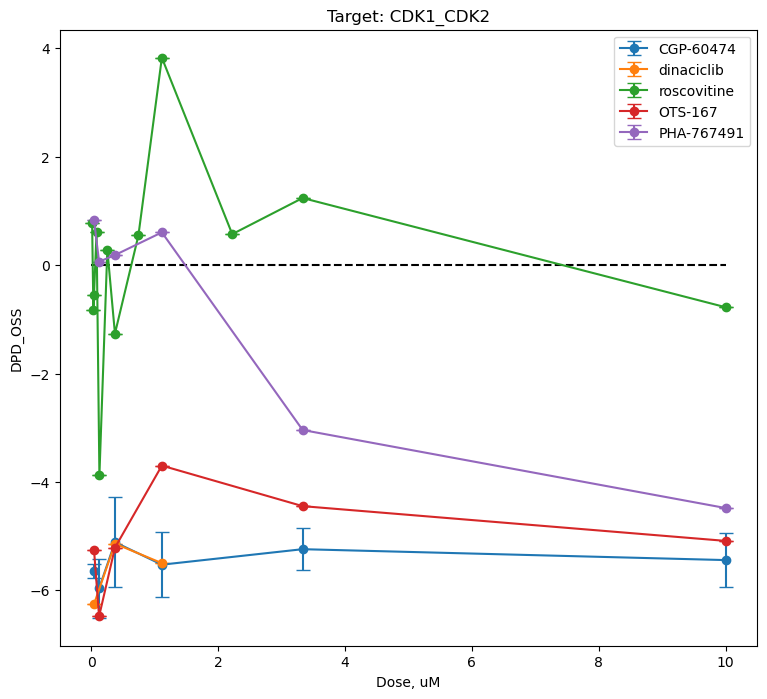

In [20]:
target_name = "CDK1_CDK2"
target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [21]:
# delete OTS-167
print_drugs += ["CGP-60474", "dinaciclib", "PHA-767491", "roscovitine"]

In [22]:
# delete for roscovitine dose 3,33 uM
labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "roscovitine") & (sig_info_cell_df.dose_float == 3.33)].index.to_list()
print(labels)

['REP.A011_HUVEC.A_24H:O08']


### PAK

In [23]:
target = "PAK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PAK: 1 ['PF-03758309']


In [24]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
PF-03758309,PAK4,"0.04 uM, 0.12 uM, 0.125 uM, 0.37 uM, 1.11 uM, ..."


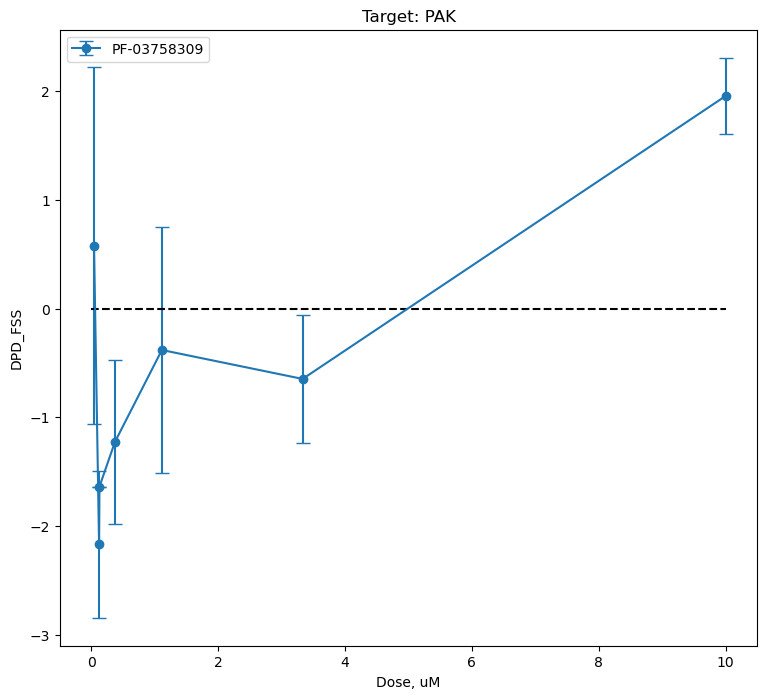

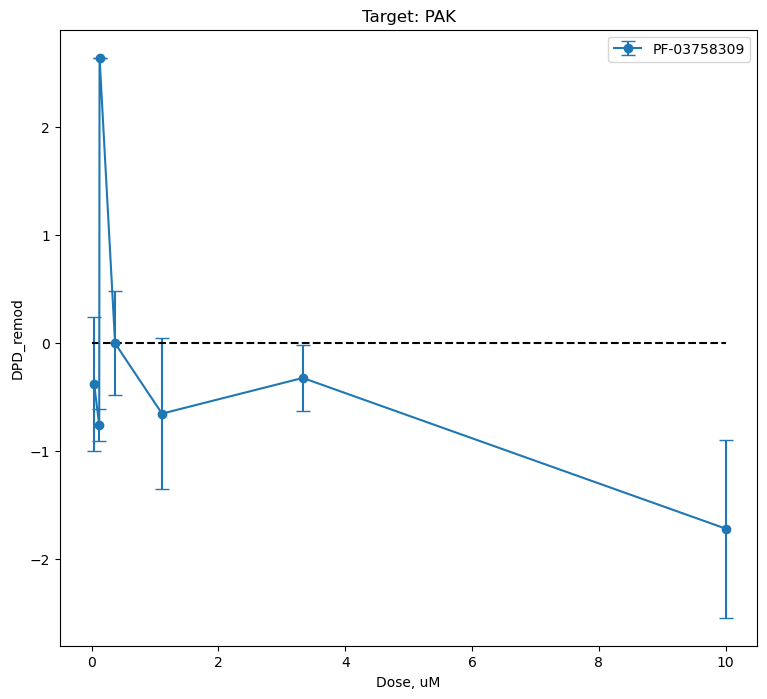

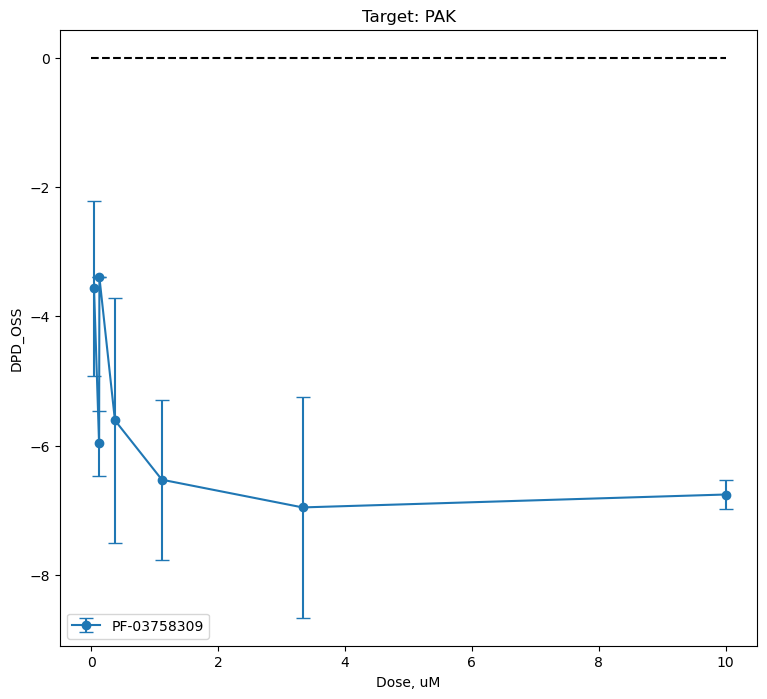

In [25]:
target_name = "PAK"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [26]:
print_drugs += target_drugs

In [27]:
# delete for PF-03758309 dose 10 uM

labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "PF-03758309") & (sig_info_cell_df.dose_float == 10)].index.to_list()
print(labels)

['LJP009_HUVEC.A_24H:D01', 'LJP009_HUVEC_24H:D01']


### PI3K

In [28]:
target = "PIK3"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK3: 4 ['PF-04691502', 'XL-147', 'idelalisib', 'quercetin']


In [29]:
drugs_list = drugs + ["GSK-2334470", "A-66", "BGT-226", "BX-795"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
PF-04691502,"MTOR, PIK3CA","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
XL-147,"PIK3CA, PIK3CD, PIK3CG","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
idelalisib,"PIK3CD, PIK3CG","0.04 uM, 0.12 uM, 0.125 uM, 0.37 uM, 1.11 uM, ..."
quercetin,PIK3CG,"0.04 uM, 0.37 uM, 1.11 uM, 10 uM, 3.33 uM"
GSK-2334470,"PDK1, PDPK1","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
A-66,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
BGT-226,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 3.33 uM"
BX-795,"PDK1, PDPK1","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


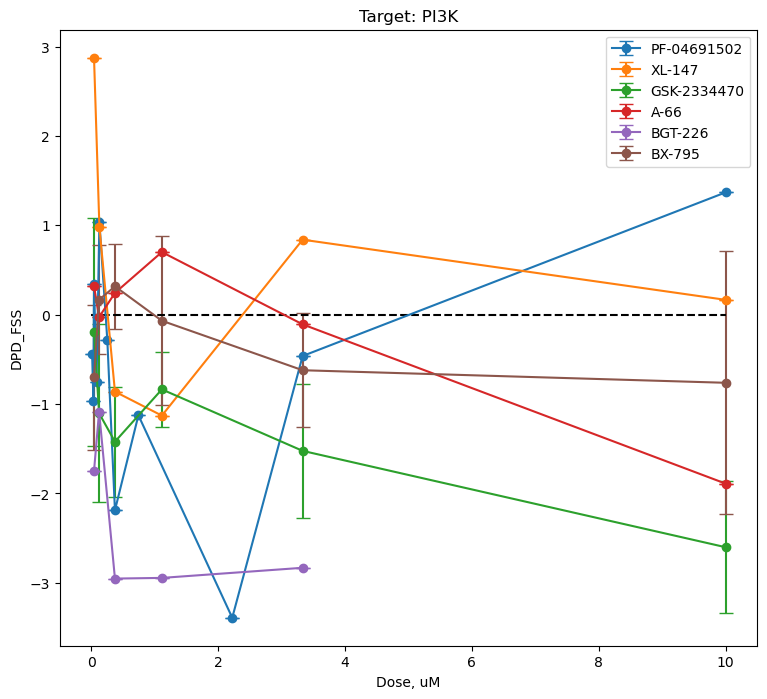

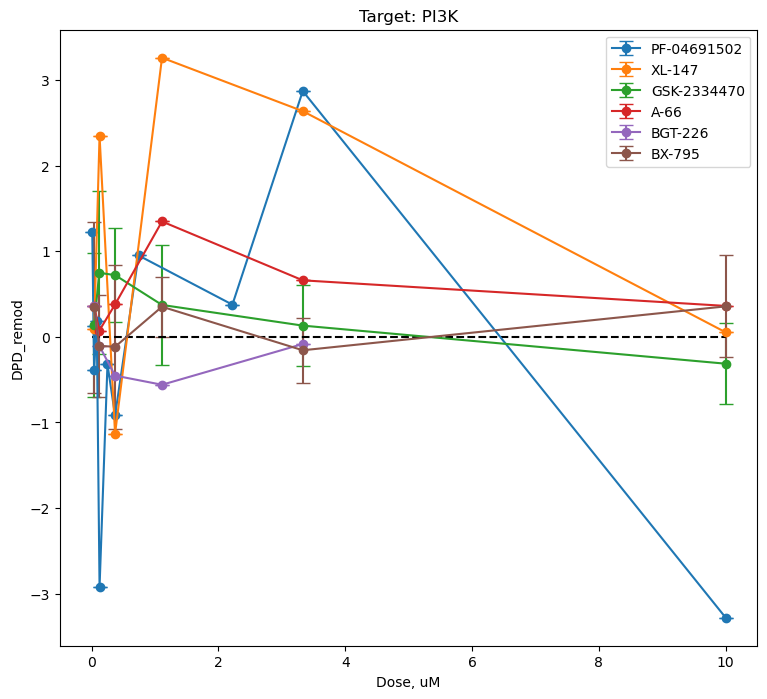

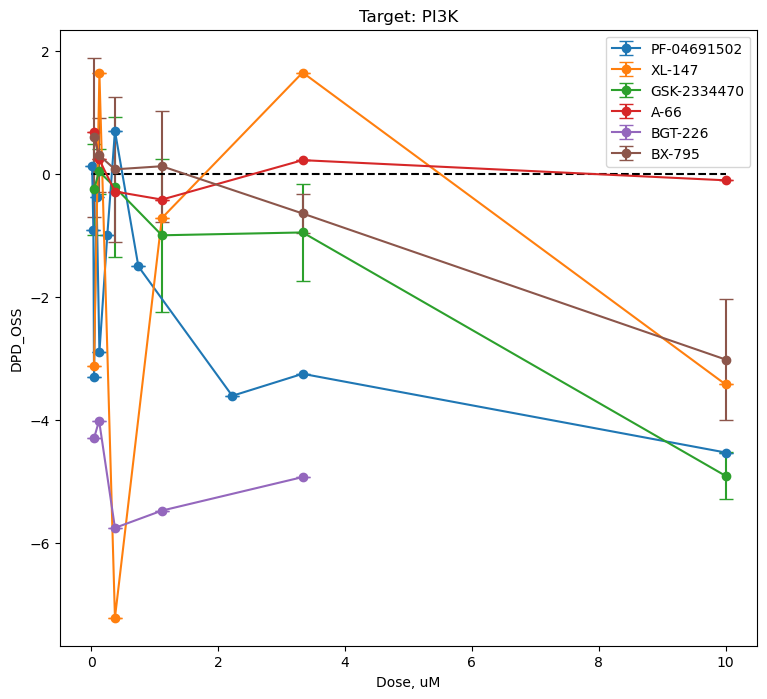

In [30]:
target_name = "PI3K"
target_drugs = ["PF-04691502", "XL-147", "GSK-2334470", "A-66", "BGT-226", "BX-795"]
# deleted idelalisib, quercetin because other targets = PIK3CD, PIK3CG (delta, gamma, we use only alpha)


for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [31]:
print_drugs += target_drugs

### ERK

In [32]:
target_name = "ERK"

target = "MAP2K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "MAPK"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "RAF"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target ERK: 20 ['AZ-628', 'BIX-02189', 'CG-930', 'FR-180204', 'GDC-0879', 'GW-5074', 'PD-0325901', 'PD-184352', 'SB-203580', 'SB-239063', 'TAK-715', 'TAK-733', 'VX-745', 'XMD-885', 'XMD-892', 'dabrafenib', 'doramapimod', 'pyrazolanthrone', 'refametinib', 'regorafenib']


In [33]:
drugs_list = drugs + ["RAF-265"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AZ-628,"BRAF, RAF1","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.12 uM, 0..."
BIX-02189,"MAP2K5, MAPK7","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
CG-930,MAPK8,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
FR-180204,"MAPK1, MAPK3","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
GDC-0879,BRAF,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
GW-5074,RAF1,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
PD-0325901,MAP2K1,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
PD-184352,MAP2K1,"0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
SB-203580,"MAPK1, MAPK11, MAPK14","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
SB-239063,"MAPK11, MAPK14","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


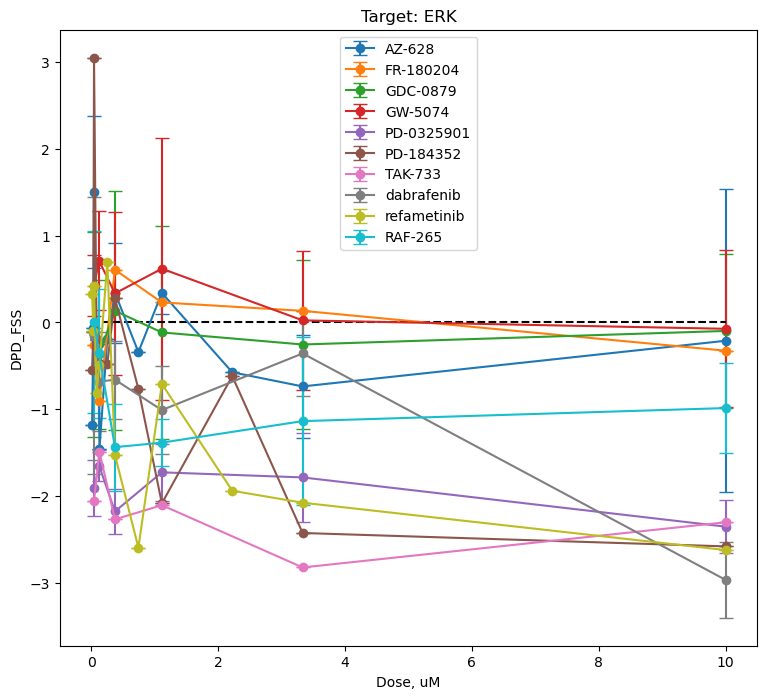

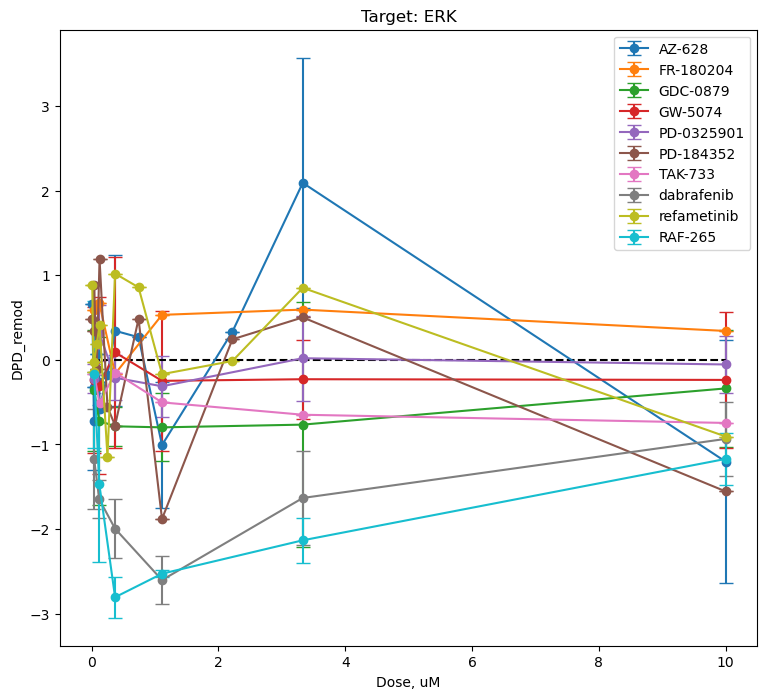

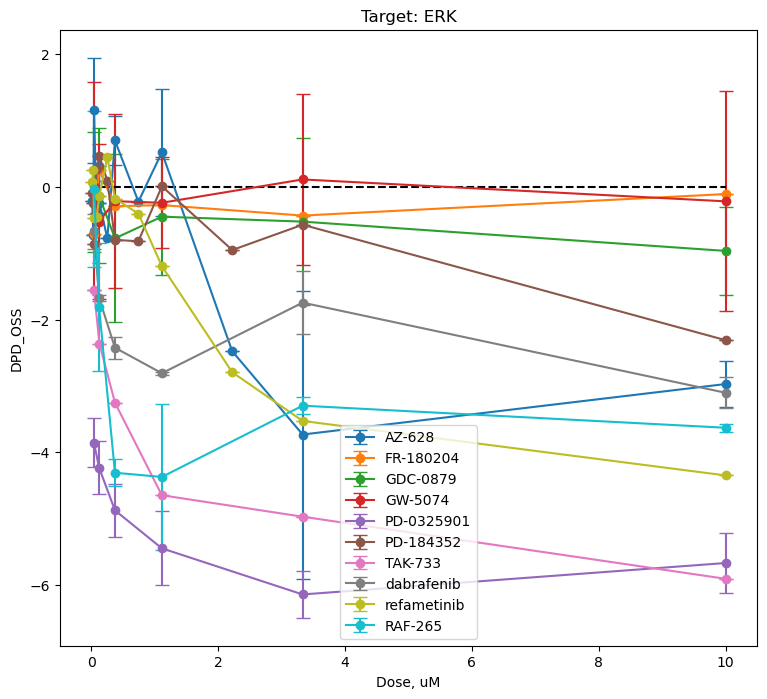

In [34]:
target_name = "ERK"
target_drugs = ["AZ-628", "FR-180204", "GDC-0879", "GW-5074", "PD-0325901", "PD-184352", "TAK-733", "dabrafenib", "refametinib", "RAF-265"]
# deleted SB-203580 (MAPK1)
# select only gene name RAF1, BRAF, MAP2K1, MAP2K2, MAPK1, MAPK3   (Kinase pathway RAF->MEK->ERK) = module "ERK2

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [35]:
print_drugs += target_drugs

### BET

In [36]:
target = "BRD4"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target BRD4: 1 ['I-BET-762']


In [37]:
drugs_list = drugs + ["I-BET-151", "JQ-1-R", "PFI-1"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
I-BET-762,"BRD2, BRD3, BRD4","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
I-BET-151,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
JQ-1-R,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
PFI-1,,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


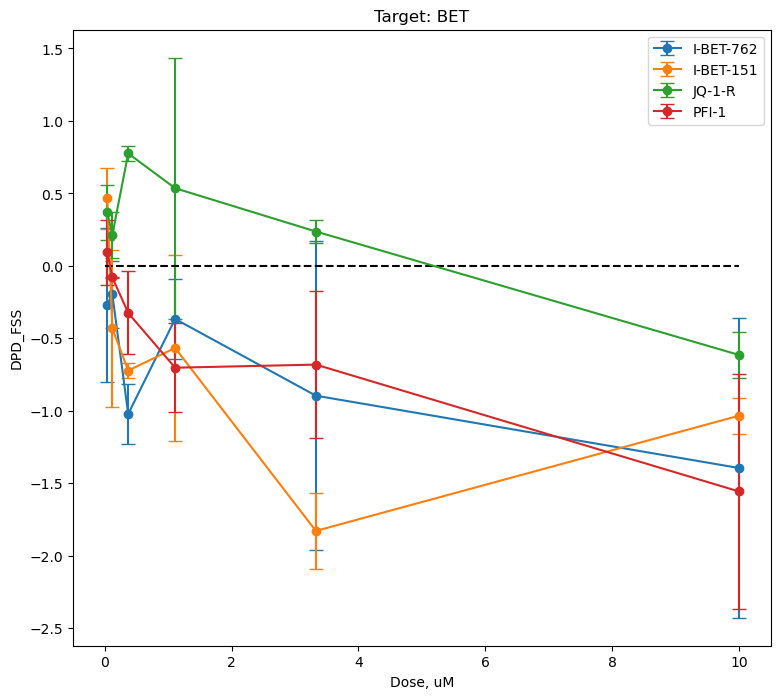

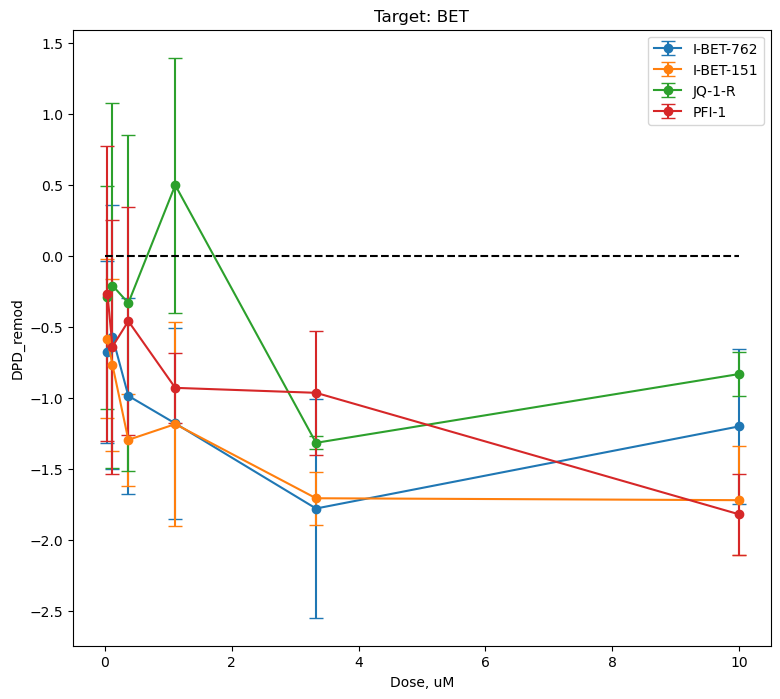

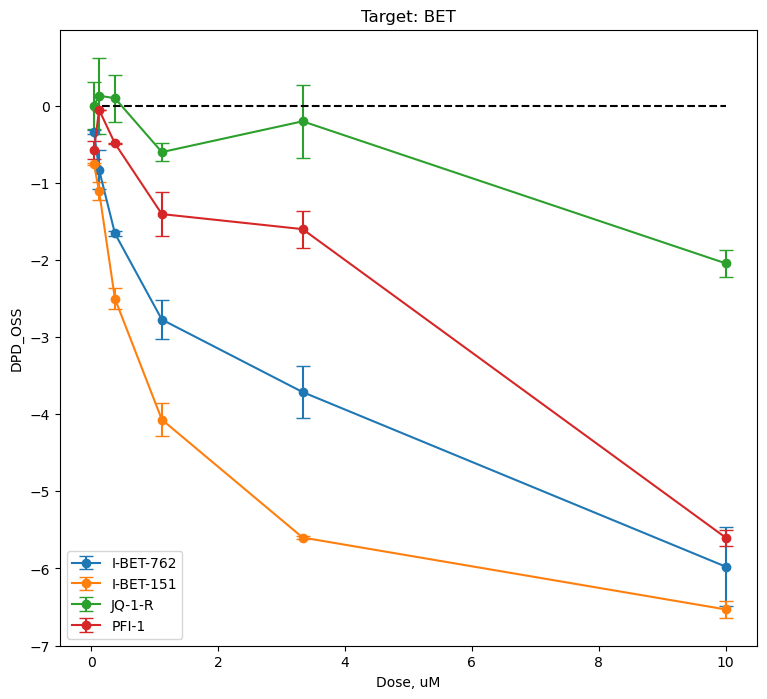

In [38]:
target_name = "BET"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [39]:
print_drugs += target_drugs

### Aurora

In [40]:
target = "AURK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AURK: 8 ['ENMD-2076', 'GSK-1070916', 'JWE-035', 'KW-2449', 'MLN-8054', 'ZM-447439', 'alisertib', 'orantinib']


In [41]:
drugs_list = drugs + ["aurora-a-inhibitor-i"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
ENMD-2076,"AURKA, FLT3, KDR, PDGFRA, SRC","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
GSK-1070916,"AURKB, AURKC","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
JWE-035,AURKA,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
KW-2449,"ABL1, AURKA, FGFR1, FLT3","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
MLN-8054,AURKA,"0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.12 uM, 0..."
ZM-447439,"AURKA, AURKB","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
alisertib,AURKA,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
orantinib,"AURKA, AURKB, FGFR1, FGFR2, KDR, PDGFRA, PDGFRB","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
aurora-a-inhibitor-i,,


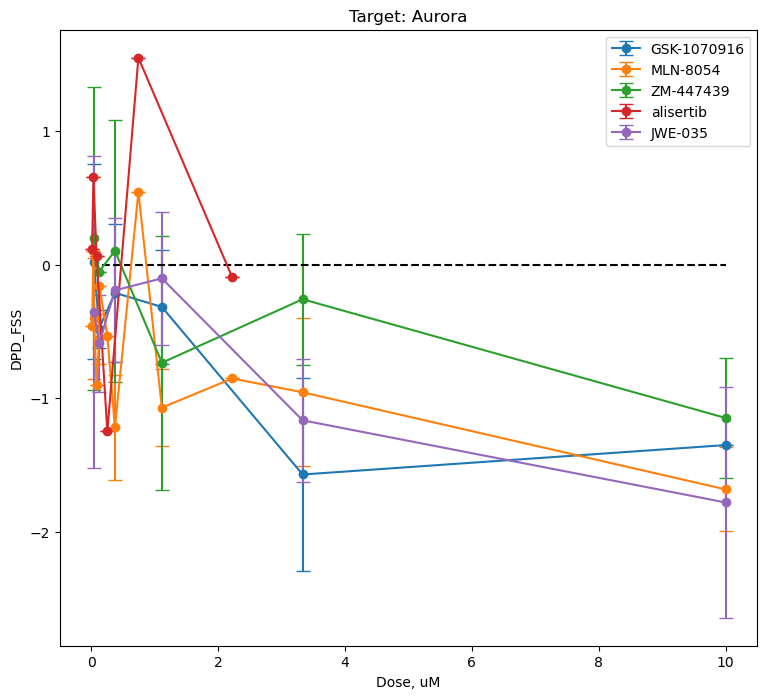

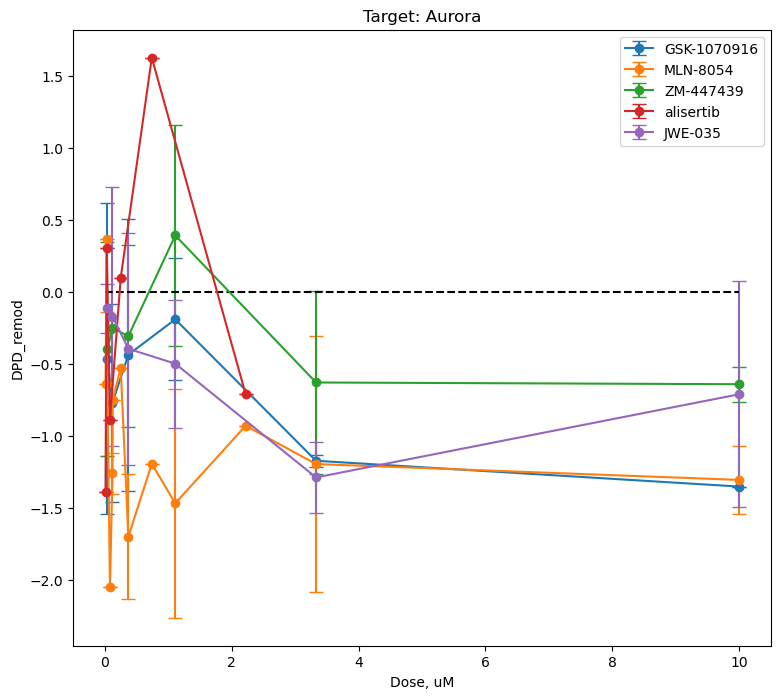

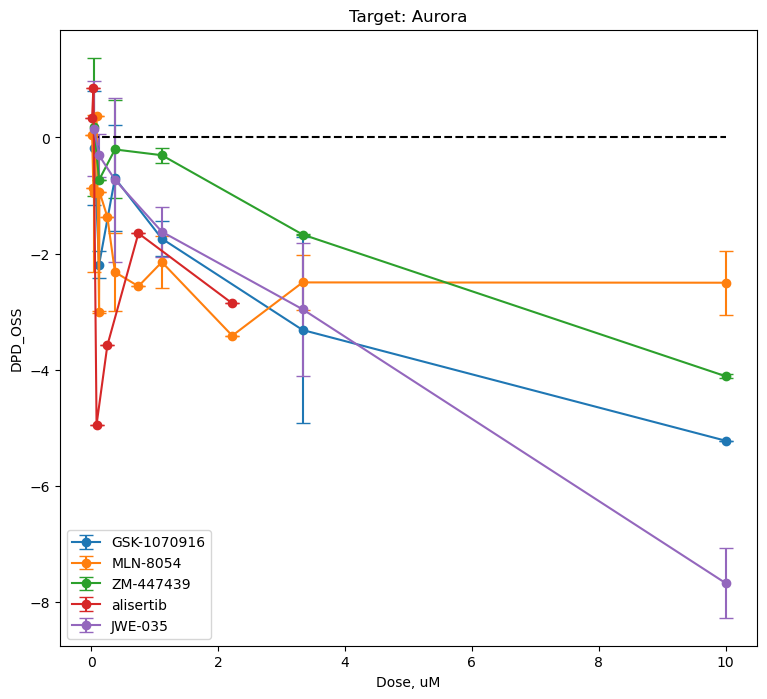

In [42]:
target_name = "Aurora"
target_drugs = ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib", "JWE-035"]
# deleted ENMD-2076, KW-2449, orantinib because other targets 
# deleted aurora-a-inhibitor-i (2017) - not in data 2020

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [43]:
# delete JWE-035 bacause no enought info
print_drugs += ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib"]

### TGFbR

In [44]:
target = "TGFBR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target TGFBR: 1 ['SB-525334']


In [45]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
SB-525334,TGFBR1,"0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


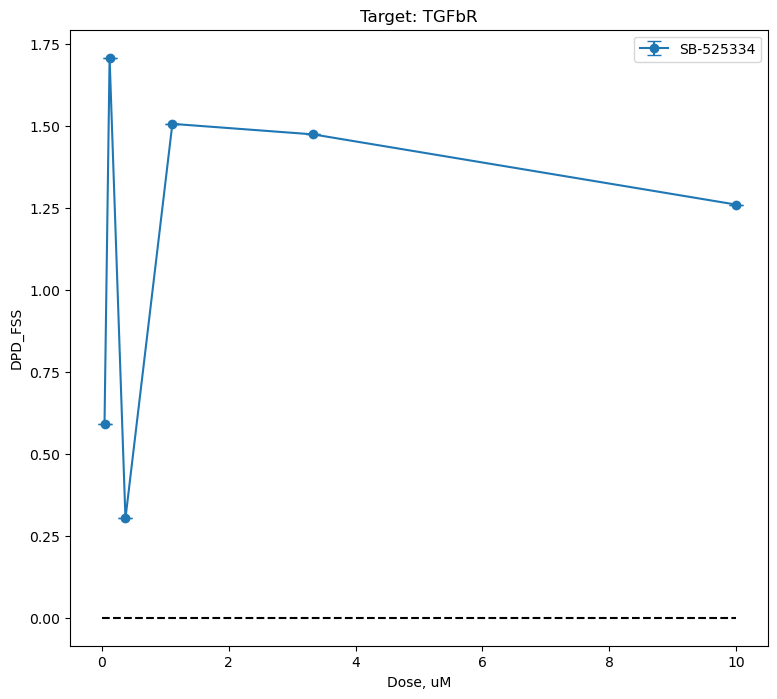

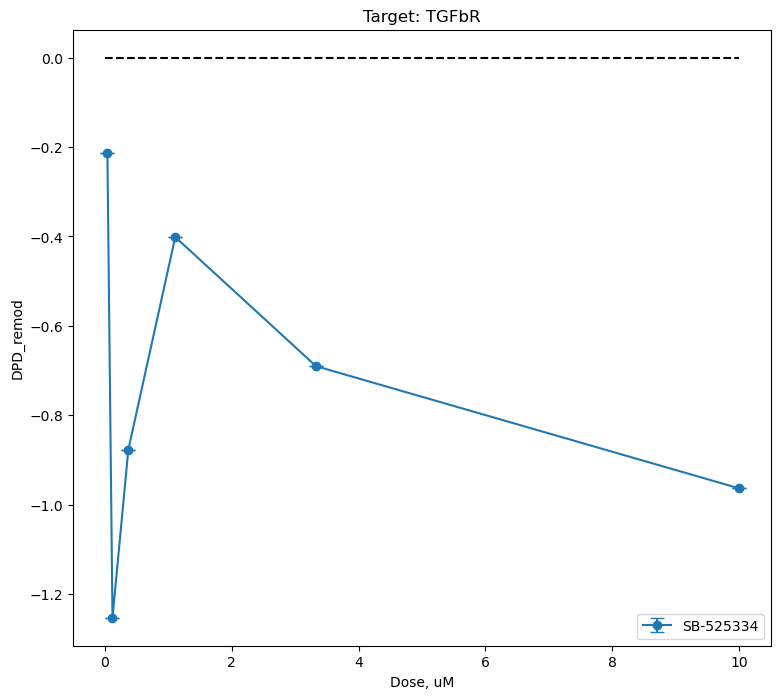

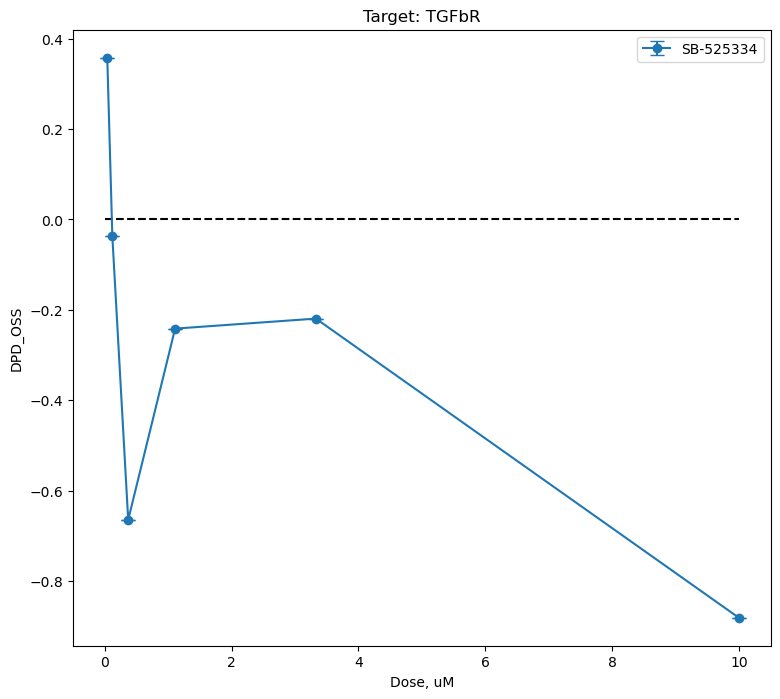

In [46]:
target_name = "TGFbR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [47]:
print_drugs += target_drugs

### VEGFR

In [48]:
drugs_list = ["rebastinib", "lenvatinib", "orantinib", "foretinib", "cediranib", "sunitinib", "tivozanib"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
rebastinib,"ABL1, BCR, FLT3, KDR, TEK","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
lenvatinib,"FGFR1, FLT1, FLT4, KDR, KIT","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
orantinib,"AURKA, AURKB, FGFR1, FGFR2, KDR, PDGFRA, PDGFRB","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
foretinib,"KDR, MET","0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
cediranib,"FLT1, FLT4, KDR, KIT, PDGFRB","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
sunitinib,"FLT1, FLT3, FLT4, KDR, KIT, PDGFRA, PDGFRB, RET","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."
tivozanib,"FLT1, FLT4, KDR, KIT, PDGFRA, PDGFRB","0.04 uM, 0.12 uM, 0.37 uM, 1.11 uM, 10 uM, 3.3..."


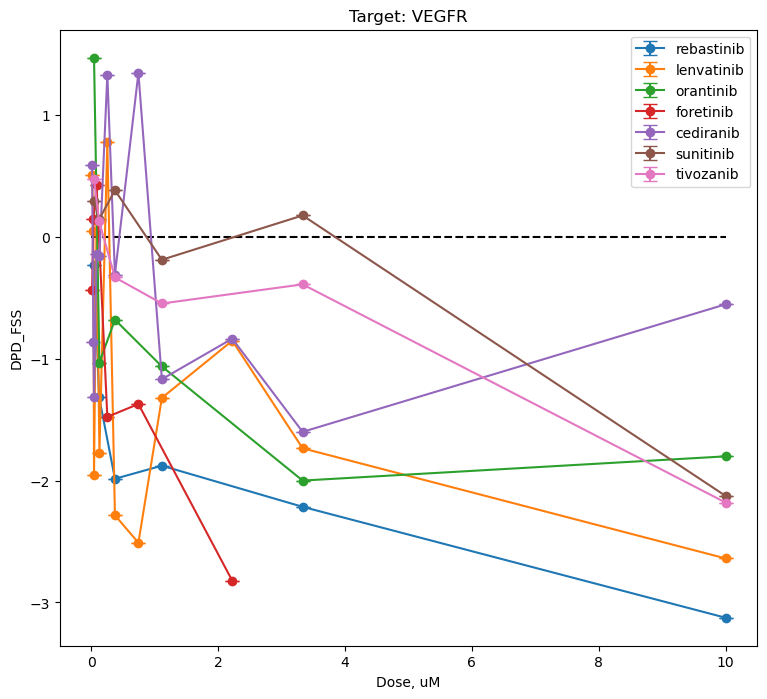

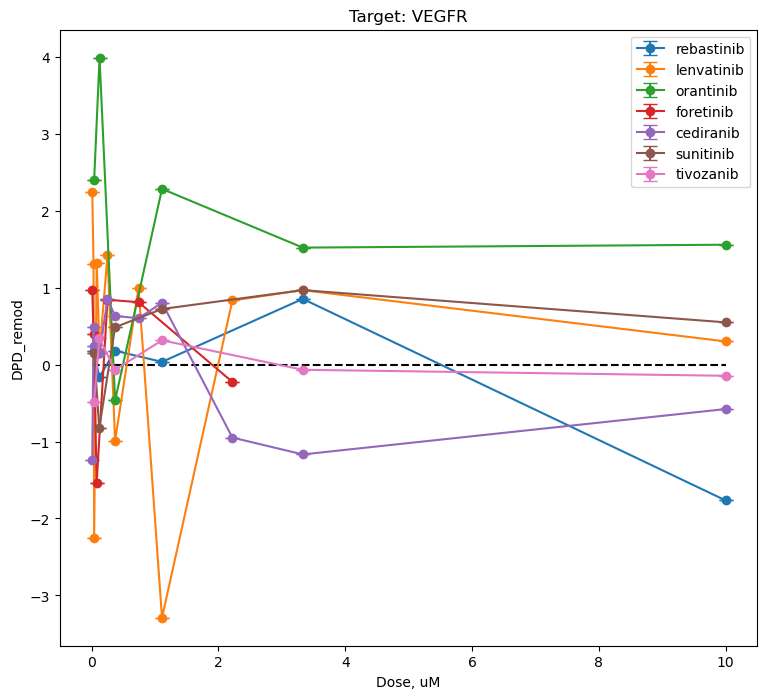

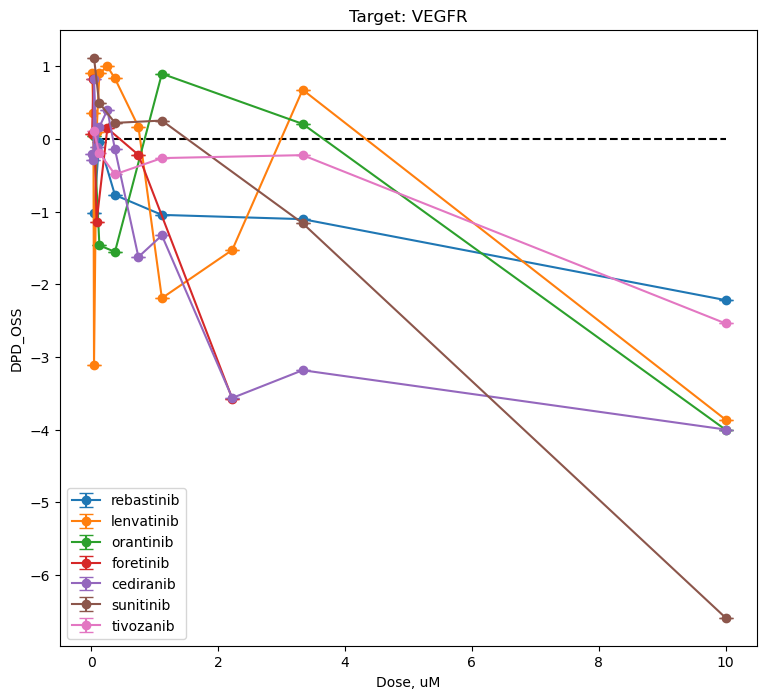

In [49]:
target_name = "VEGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [50]:
print_drugs += target_drugs

### PKC

In [51]:
target = "PRKC"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PRKC: 1 ['enzastaurin']


In [52]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
enzastaurin,PRKCB,"0.01 uM, 0.03 uM, 0.08 uM, 0.74 uM, 2.22 uM"


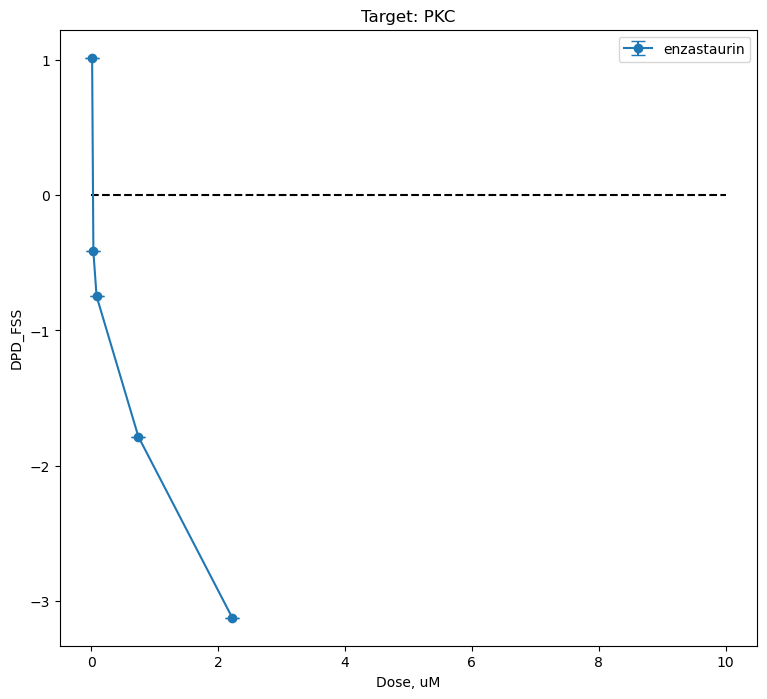

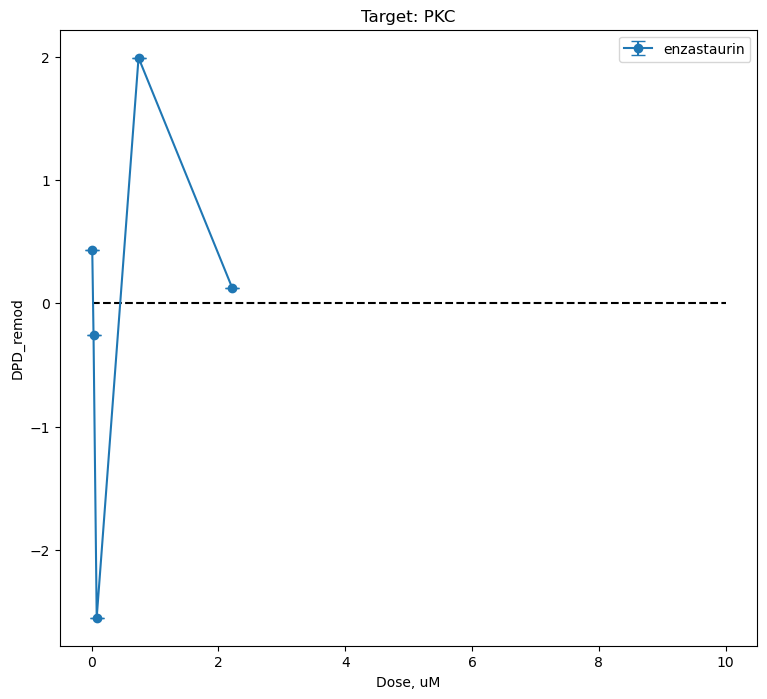

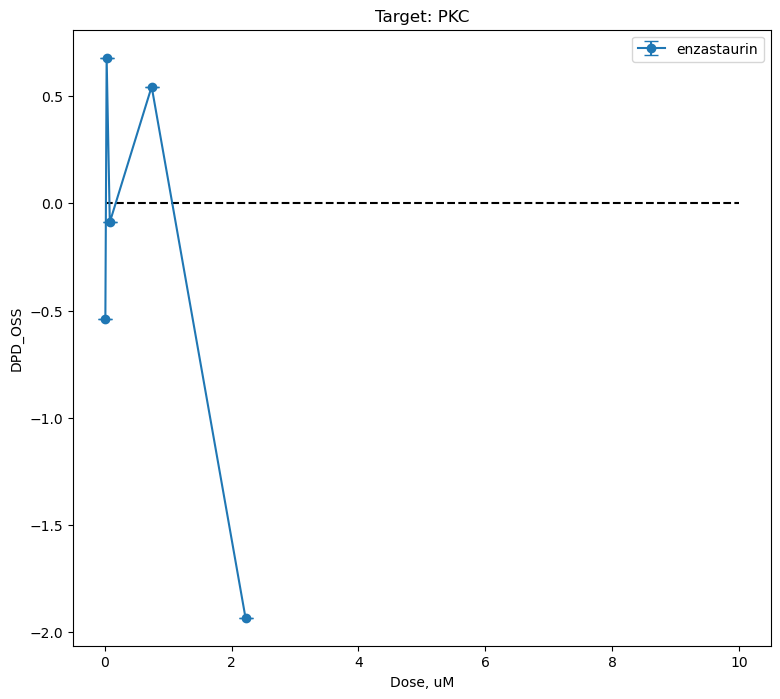

In [53]:
target_name = "PKC"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [54]:
print_drugs += target_drugs

### PTGS

In [55]:
target = "PTGS"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PTGS: 19 ['aminosalicylic-acid', 'amtolmetin-guacil', 'balsalazide', 'celecoxib', 'epirizole', 'etofenamate', 'indometacin', 'indoprofen', 'ketorolac', 'meloxicam', 'metamizole', 'naproxen', 'nepafenac', 'nimesulide', 'paracetamol', 'piroxicam', 'resveratrol', 'sasapyrine', 'voriconazole']


In [56]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
aminosalicylic-acid,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
amtolmetin-guacil,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
balsalazide,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
celecoxib,PTGS2,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
epirizole,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
etofenamate,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
indometacin,"PPARG, PTGDR2, PTGS1, PTGS2","0.04 uM, 0.37 uM, 1.11 uM, 10 uM, 3.33 uM"
indoprofen,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
ketorolac,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.08 uM, 0.125 uM, 0.25 uM, ..."
meloxicam,"PTGS1, PTGS2","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."


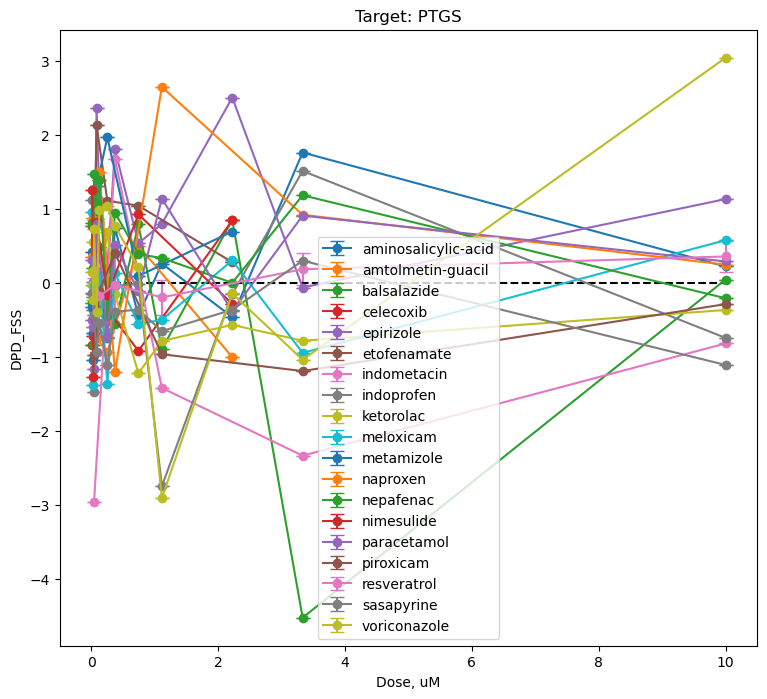

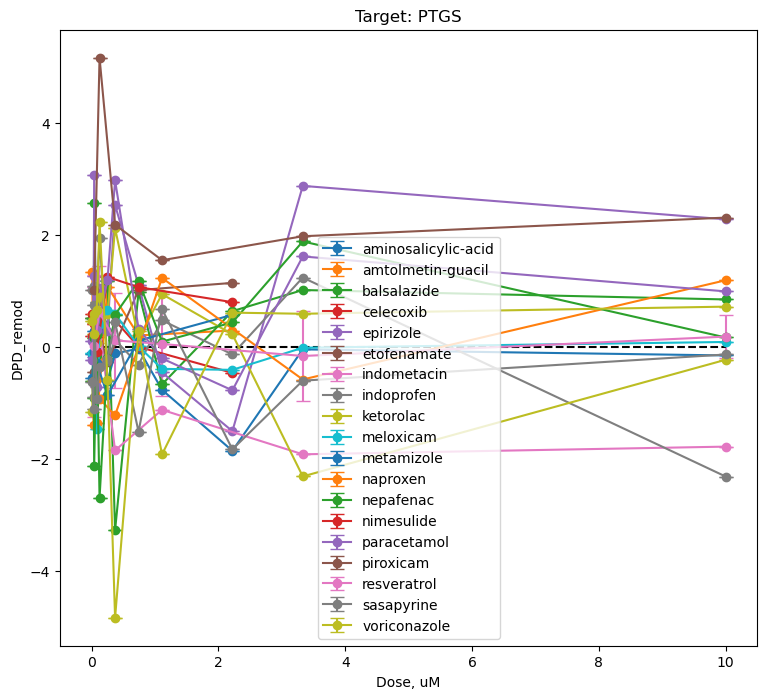

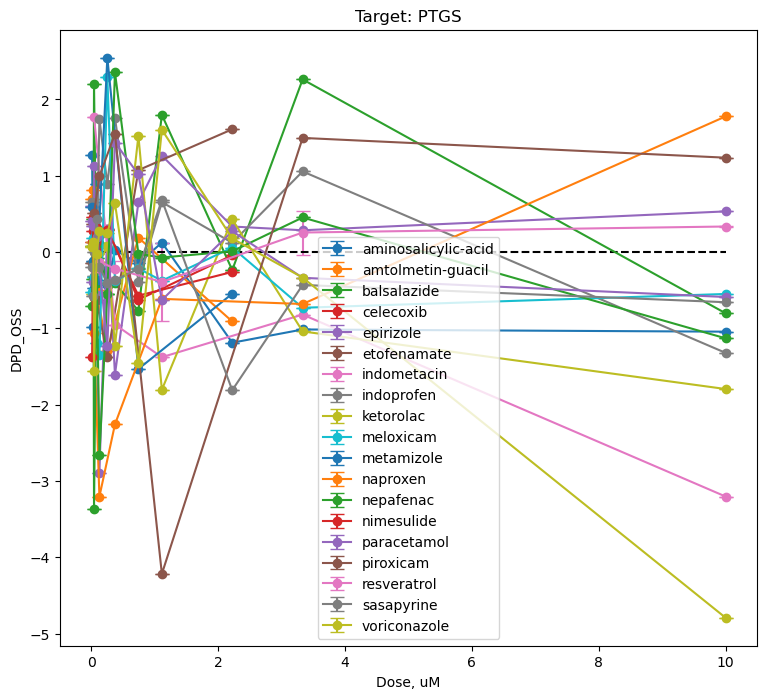

In [57]:
target_name = "PTGS"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [58]:
# delete module "PTGS"

### PSMB

In [59]:
target = "PSMB"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PSMB: 3 ['MG-132', 'bortezomib', 'ixazomib']


In [60]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
MG-132,PSMB1,20 uM
bortezomib,"PSMB1, PSMB2, PSMB5","0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 20..."
ixazomib,PSMB1,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM"


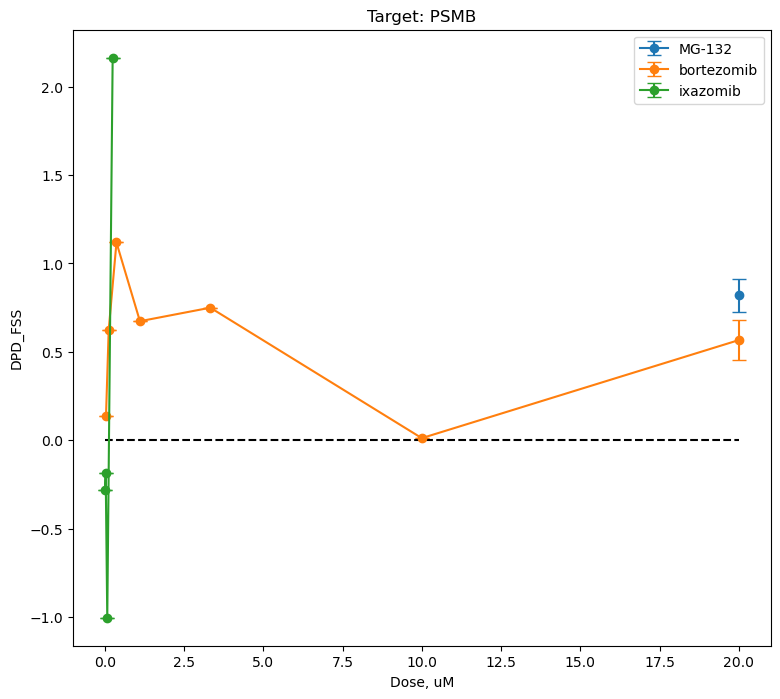

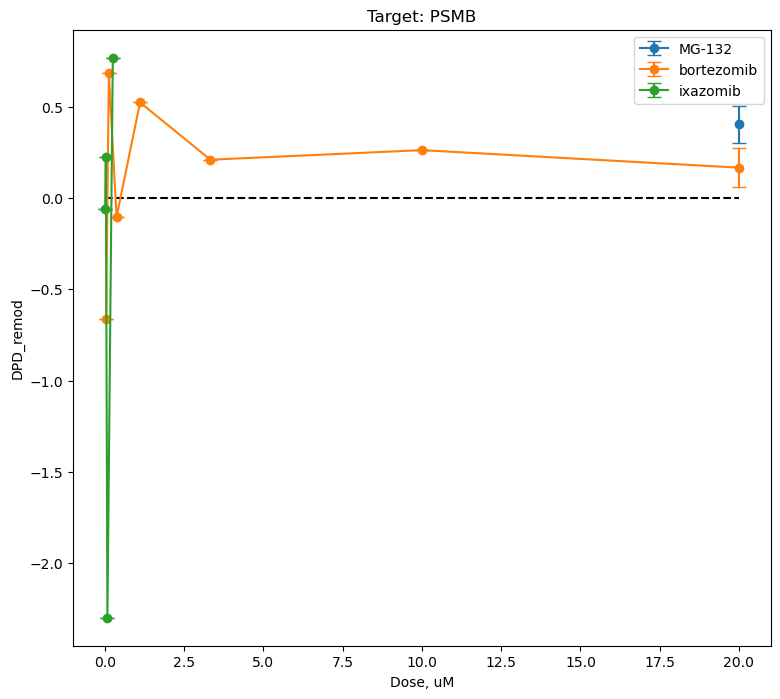

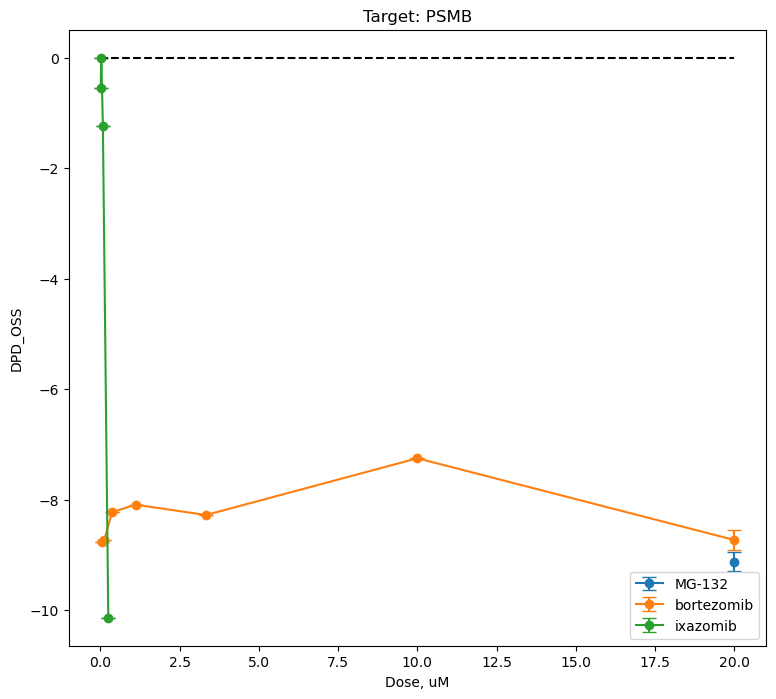

In [61]:
target_name = "PSMB"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,20], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [62]:
print_drugs += target_drugs

### GPBAR

In [63]:
target = "GPBAR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target GPBAR: 1 ['betulinic-acid']


In [64]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
betulinic-acid,GPBAR1,"0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."


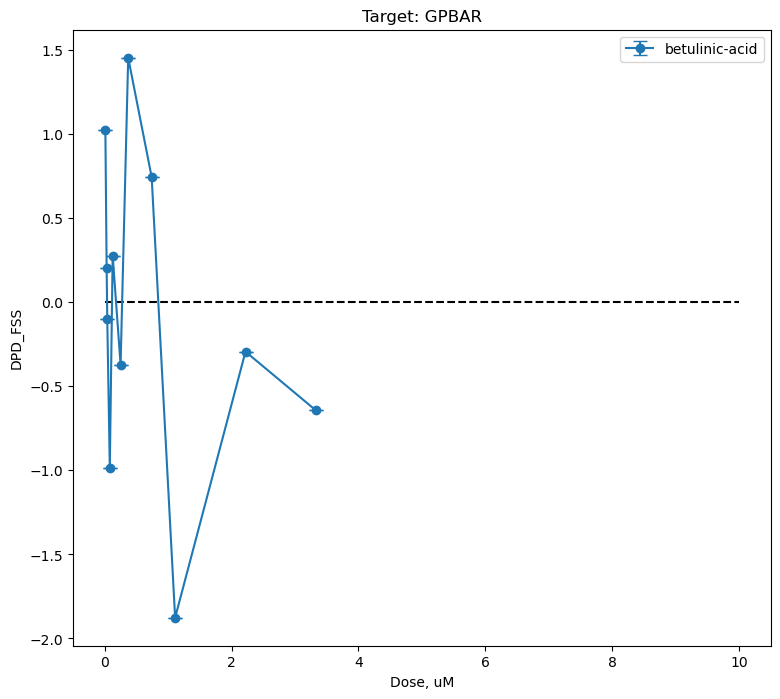

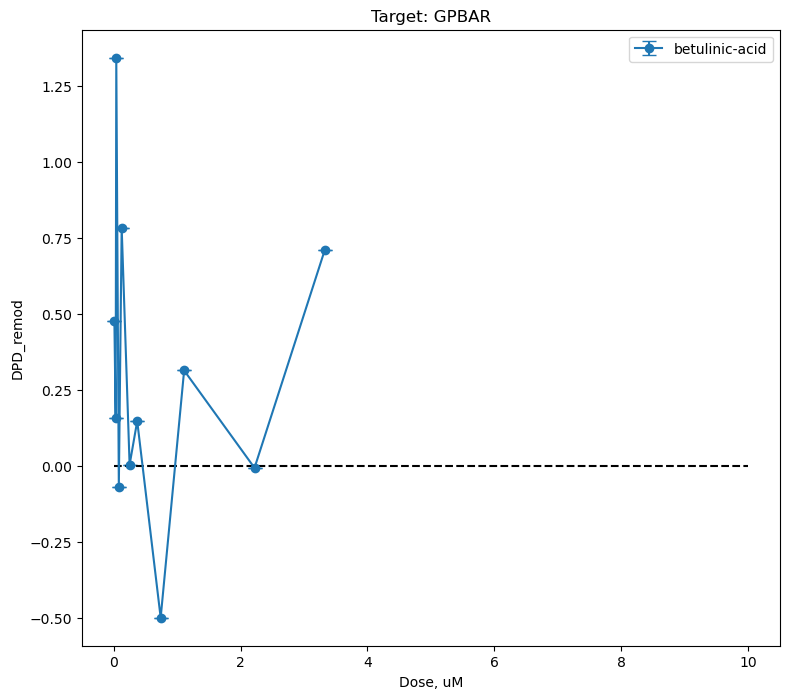

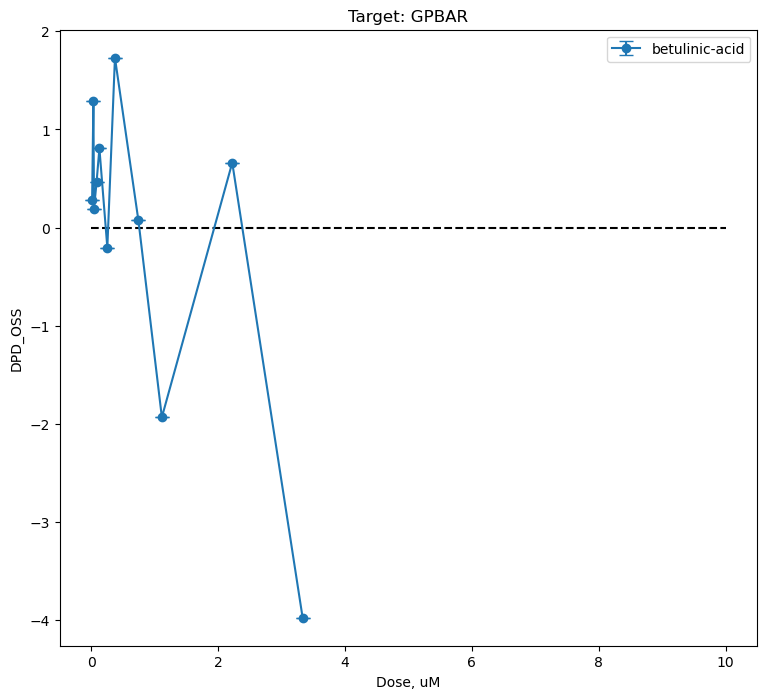

In [65]:
target_name = "GPBAR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [66]:
# delete module "GPBAR"

### PPARG

In [67]:
target = "PPARG"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PPARG: 6 ['balaglitazone', 'bezafibrate', 'ciglitazone', 'indometacin', 'mifobate', 'rosiglitazone']


In [68]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
balaglitazone,PPARG,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
bezafibrate,"PPARA, PPARD, PPARG","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
ciglitazone,PPARG,"0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
indometacin,"PPARG, PTGDR2, PTGS1, PTGS2","0.04 uM, 0.37 uM, 1.11 uM, 10 uM, 3.33 uM"
mifobate,PPARG,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
rosiglitazone,PPARG,"0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."


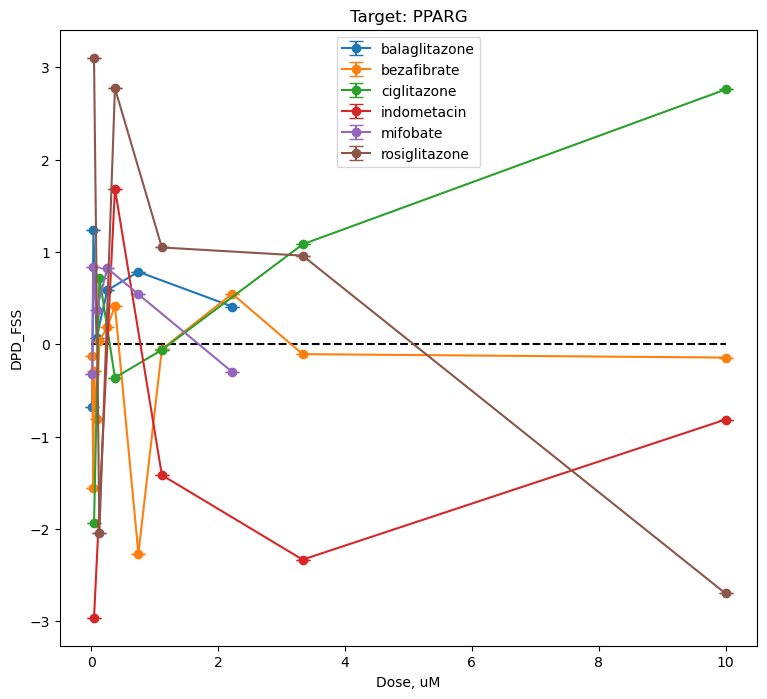

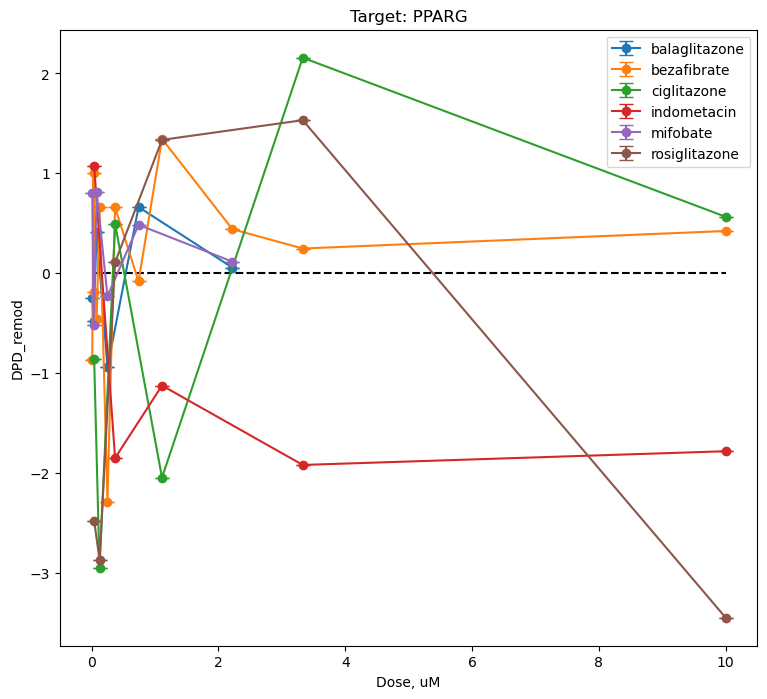

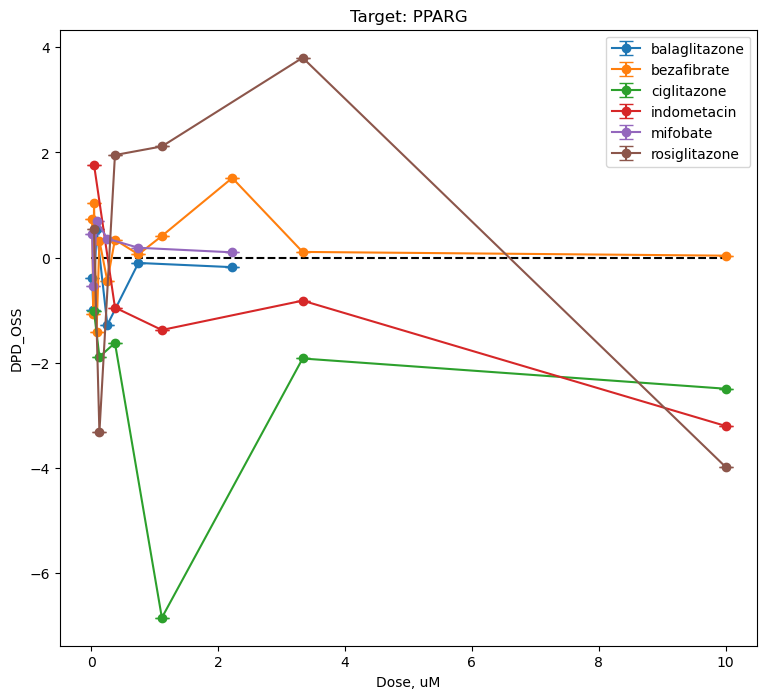

In [69]:
target_name = "PPARG"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [70]:
# delete module "PPARG"

In [71]:
print(print_drugs)

print_drugs_df = pd.DataFrame(print_drugs)
display(print_drugs_df)

print_drugs_df.to_excel("drugs.xlsx")

['CGP-60474', 'dinaciclib', 'PHA-767491', 'roscovitine', 'PF-03758309', 'PF-04691502', 'XL-147', 'GSK-2334470', 'A-66', 'BGT-226', 'BX-795', 'AZ-628', 'FR-180204', 'GDC-0879', 'GW-5074', 'PD-0325901', 'PD-184352', 'TAK-733', 'dabrafenib', 'refametinib', 'RAF-265', 'I-BET-762', 'I-BET-151', 'JQ-1-R', 'PFI-1', 'GSK-1070916', 'MLN-8054', 'ZM-447439', 'alisertib', 'SB-525334', 'rebastinib', 'lenvatinib', 'orantinib', 'foretinib', 'cediranib', 'sunitinib', 'tivozanib', 'enzastaurin', 'MG-132', 'bortezomib', 'ixazomib']


,0
0,CGP-60474
1,dinaciclib
2,PHA-767491
3,roscovitine
4,PF-03758309
5,PF-04691502
6,XL-147
7,GSK-2334470
8,A-66
9,BGT-226
